# Homework 8
###### by Mher Movsisyan
---

### Problem 1. (30 points)
A random variable X follows an exponential distribution with mean 1/𝛽. Assume
the prior distribution of 𝛽 is another exponential distribution with parameter 1.5.
Suppose a single point is drawn from the distribution of X, which is equal to 1.2 (x = 1.2).  
a) Find the posterior distribution of 𝛽 (10 points)  
b) Determine the Bayes estimate of 𝛽 under the 0/1 loss function. (10 points)  
c) Determine the Bayes estimate of 𝛽 under the squared-error loss function. (10 points)  

Answer: a)  
$$ \lambda_X = \beta $$  
$$ \lambda_{\beta} = \frac{1}{1.5} $$  
$$ \bar{\lambda_{X}^{*}} = 1.2 $$  
$$ n_X = 1 $$
$$ X \sim Exp(\beta) $$
$$ \beta \sim Exp(1.5) $$

$$ \pi(\beta \vert x) \propto \pi(x | \beta) * \pi(\beta) $$
$$ \pi(x | \beta) = \beta * e^{-1.2 * \beta} $$
$$ \pi(\beta) = 1.5 * e^{-1.5\beta} $$
$$ \pi(\beta \vert x) \propto \beta * e^{-1.2 * \beta} * 1.5 * e^{-1.5\beta} = 1.5 \beta e^{-2.7\beta} $$

We can see that a gamma distribution emerged where.
$$ b = \frac{1}{2.7}\ \ \ \ \ \ a = 2 $$

Answer: b)  
This is the mode, which for a gamma distribution is $ \frac{\alpha - 1}{\beta} = 2.7 $

Answer: c)  
This is the mean, which for a gamma distribution is $ \frac{\alpha}{\beta} = 5.4 $

### Problem 2 (20 points)  
Suppose that a sample consisting of 12, 9, 7, 11, 10, 8, 7, 13, 10 and 7 outcomes
from a Poisson population with mean $ \lambda $. Assume that the parameter $ \lambda $ follows a
gamma distribution with parameters (4, 2).  
a) Find the posterior distribution of $ \lambda $ (10 points)  
b) Under the squared-error loss function, find the Bayes estimate of $ \lambda $ (10 points)  


Answer:  
$$ \pi(x \vert \lambda) \sim Poisson(\lambda) \propto \prod_{i = 1}^{n} e^{-\lambda}\frac{\lambda^{x_i}}{x_i!} $$
$$ \pi(\lambda) \sim Gamma(4, 2) \propto \frac{\lambda^3}{3^4} * e^{-\frac{\lambda}{2}} $$
  


$$ \pi(\lambda \vert x) \propto e^{-(n + 0.5)\lambda} \frac{\lambda^{(n+3)x_i}}{3^4\prod_{i=1}^{n} x_i!}

$$ \hat{\lambda} = 95 * \frac{1}{11} = 8.63 $$

### Problem 3 (20 points)  
In Armenia for a person, a probability to have an advanced knowledge of English is
4%. Assume a person passed the test of having advanced knowledge of English
(Probability to pass test with advanced knowledge is 95%, Probability to fail
without advance knowledge is 93%)  
a) Calculate the posterior probabilities of having advanced English knowledge
𝑃(𝐴| 𝑝𝑎𝑠𝑠𝑒𝑑) and intermediate English or less knowledge 𝑃(𝐼| 𝑝𝑎𝑠𝑠𝑒𝑑)
given that test is passed (5 points)  
b) Given initial and posterior probabilities calculated in part a, derive Bayes
Factor, where 𝐻1 − is having an Intermediate or less knowledge, 𝐻2 − is
having advanced knowledge of English(10 points)  
c) Based on the results in part b, what can we conclude about evidence against
hypothesis of having a less than advanced knowledge? (5 points)

Answer:  
$$ P(A \vert passed) = \frac{0.038}{0.105} = 0.36 $$
$$ P(I \vert passed) = \frac{0.067}{0.105} = 0.64 $$

$$ B[H_2:H_1] = 13.57 $$
We can conclude that you have practically-significantly more chances to pass when you know good english

### Problem 4 (R) (30 points)  
The data in `stay_at_home_covid.csv` represent the level of restrictions (0-no
restriction, 2-strong restriction) taken by the government of seven countries.  
a) Count mean of every country’s restriction of 2020 and 2021 (5 points)  
b) Draw a histograms of mean restriction level for 2020 and 2021 (5 points)  
c) Implement a t-test that compares mean restriction for 2020 and 2021 (5
points)  
d) Implement a Bayes factor test that compares mean restriction for 2020 and
2021 (5 points)  
e) What conclusions can we make from results in parts c and d? (5 points)  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(df := pd.read_csv("stay-at-home-covid.csv", parse_dates=["date"]))

,country,date,policy
0,Belgium,2020-01-01,0
1,Belgium,2020-01-02,0
2,Belgium,2020-01-03,0
3,Belgium,2020-01-04,0
4,Belgium,2020-01-05,0
...,...,...,...
4381,Spain,2021-12-27,1
4382,Spain,2021-12-28,1
4383,Spain,2021-12-29,1
4384,Spain,2021-12-30,1


In [8]:
df["year"] = df.date.dt.year
df

,country,date,policy,year
0,Belgium,2020-01-01,0,2020
1,Belgium,2020-01-02,0,2020
2,Belgium,2020-01-03,0,2020
3,Belgium,2020-01-04,0,2020
4,Belgium,2020-01-05,0,2020
...,...,...,...,...
4381,Spain,2021-12-27,1,2021
4382,Spain,2021-12-28,1,2021
4383,Spain,2021-12-29,1,2021
4384,Spain,2021-12-30,1,2021


In [11]:
(means := df.groupby(["year", "country"]).policy.mean().reset_index(drop=False))

,year,country,policy
0,2020,Belgium,0.997268
1,2020,France,0.830601
2,2020,Germany,0.571038
3,2020,Italy,1.710383
4,2020,Poland,0.407104
5,2020,Spain,1.224044
6,2021,Belgium,0.923288
7,2021,France,0.931507
8,2021,Germany,1.328767
9,2021,Italy,1.912329


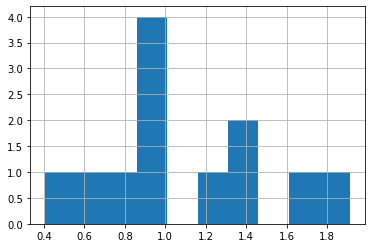

In [17]:
means.policy.hist();